In [24]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

# https://en.wikipedia.org/wiki/Audio_frequency
maxFrecuency = 20000
minFrecuency = 20
frequencyDifference = ctrl.Antecedent(
    np.arange(0, maxFrecuency - minFrecuency, 1),
    "frequency",
)

# https://www.harpsatsang.com/harp_design/data/stringcalculator.html
maxLength = 1.2
minLength = 0.08
stringLength = ctrl.Antecedent(np.arange(minLength, maxLength, 0.01), "stringLength")

turn = ctrl.Consequent(np.arange(0, 1.1, 0.1), "turn")

frequencyDifference.automf(names=["close", "far"])
stringLength.automf(names=["small", "long"])

turn["very_little"] = fuzz.trimf(turn.universe, [0, 0.05, 0.1])
turn["little"] = fuzz.trimf(turn.universe, [0.1, 0.3, 0.5])
turn["medium"] = fuzz.trimf(turn.universe, [0.4, 0.6, 0.8])
turn["a_lot"] = fuzz.trimf(turn.universe, [0.7, 1, 1])

rule1 = ctrl.Rule(
    frequencyDifference["close"] & stringLength["small"], turn["very_little"]
)
rule2 = ctrl.Rule(
    frequencyDifference["close"] & stringLength["long"], turn["very_little"]
)
rule3 = ctrl.Rule(
    frequencyDifference["far"] & stringLength["small"], turn["medium"]
)
rule4 = ctrl.Rule(frequencyDifference["far"] & stringLength["long"], turn["a_lot"])

turn_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
turner = ctrl.ControlSystemSimulation(turn_ctrl)


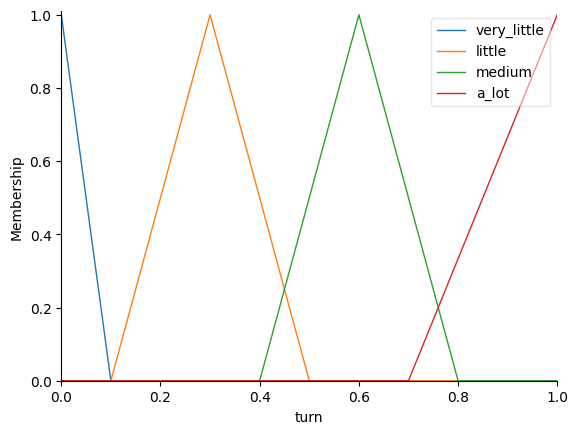

In [23]:
turn.view()
#turn["fully_loosen"] = fuzz.trimf(turn.universe, [-5, -5, 0])
#turn["slightly_loosen"] = fuzz.trimf(turn.universe, [-2.5, -2.5, 0])
#turn["slightly_tighten"] = fuzz.trimf(turn.universe, [0, 2.5, 2.5])
#turn["fully_tighten"] = fuzz.trimf(turn.universe, [0, 5, 5])

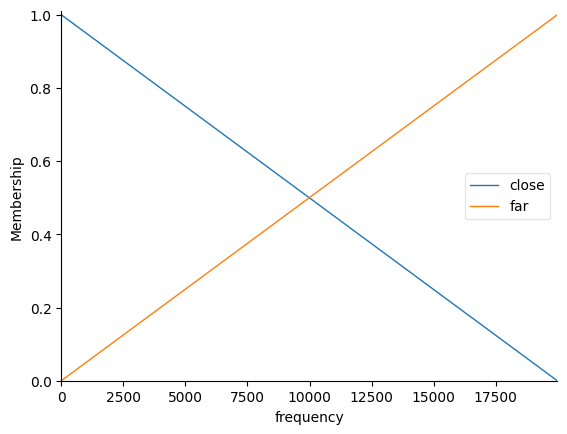

In [11]:
frequencyDifference.view()

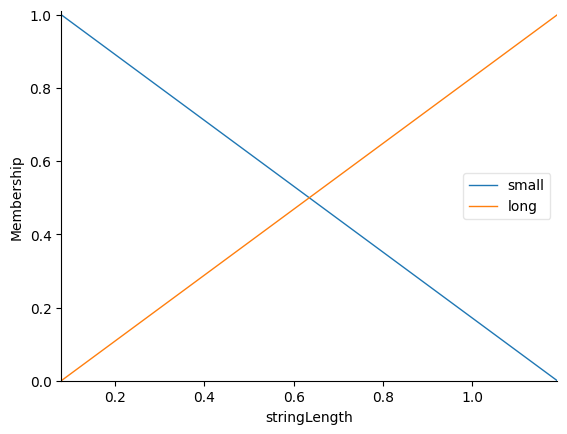

In [26]:
stringLength.view()